### W3 & W4: Data Engineering Assignment Part 2 : PCA & LDA       

### Submitted by Jophy Joseph on July 01, 2022

### About the dataset (Product data)
The dataset consists of various features like Order number, quantity ordered, Price of each product, Order line number of the product that are important in predicting whether the product has been shipped or not.

### Objective: 
To train a PCA model to visualize its higher-dimensional data and to train a LDA(Linear Discriminant Analysis) model to predict which of the products has been shipped and which of the products has been canceled.

### Dataset Features-
**ORDER NUMBER:** Order number of the product.

**QUANTITY ORDERED:** Ordered quantity.

**PRICEEACH:** Price of each product.

**ORDERLINENUMBER:** Order line number of the product.

**SALES:** Sales of the product.

**ORDERDATE**:Order date of the product.

**STATUS:** Shipping status(i.e. Shipped or canceled or Resolved) (TARGET)

**STATE:** state where the product needs to be shipped

**COUNTRY:** Country where the product to be shipped.

And so on...


## Table of Content

1. **[Data Loading and Exploration](#eda)**
2. **[PCA for Visualization](#pca)**
3. **[PCA for dimension reduction](#pca-dim)**
3. **[Linear Discriminant Analysis (LDA)](#lda)**

<a id="eda"></a>
## Data Loading and Exploration

### 1. Import the required libraries

In [142]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# import seaborn library for an advance visualization
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier and random forest classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [143]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [144]:
# load the csv file
df_salesdata = pd.read_csv('sales_data_sample.csv')

### 2. Display a sample of five rows of the data frame

In [145]:
# display the first five observations
df_salesdata.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using .info() method

In [146]:
df_salesdata.shape

(2823, 25)

In [147]:
df_salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**Interpretation: The above output shows that some of the independent variables are objects and the target variable is also 
an object.So we would need to some type conversions.**

### 4. Check the percentage of missing values in each column of the data frame. 


In [148]:
# the variable with highest number of missing values will appear first
Total = df_salesdata.isnull().sum().sort_values(ascending=False)          

# calculate the percentage of missing values
Percent = (df_salesdata.isnull().sum()*100/df_salesdata.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ADDRESSLINE2,2521,89.302161
STATE,1486,52.639036
TERRITORY,1074,38.044633
POSTALCODE,76,2.692171
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


### 5. Check if there are any duplicate rows

In [149]:
df_salesdata.duplicated().sum()

0

***Conclusion: No duplicate rows***

### 6. Write a function that will impute missing values of the columns “STATE”,“POSTALCODE”,“TERRITORY” with its most occurring label.


In [150]:
def fn_impute(col_name):
    val_to_impute = df_salesdata[col_name].mode()[0]
    df_salesdata[col_name].fillna(val_to_impute, inplace=True)

In [151]:
#calling the impute function
fn_impute('STATE')
fn_impute('POSTALCODE')
fn_impute('TERRITORY')

In [152]:
Total = df_salesdata.isnull().sum().sort_values(ascending=False)          
Percent = (df_salesdata.isnull().sum()*100/df_salesdata.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ADDRESSLINE2,2521,89.302161
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
TERRITORY,0,0.000000
COUNTRY,0,0.000000
POSTALCODE,0,0.000000
STATE,0,0.000000
CITY,0,0.000000


*** Now only addressline2 has a very large number of missing data ***

### 7. Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.

In [153]:
df_salesdata = df_salesdata.drop(["ADDRESSLINE2","ORDERDATE","PHONE"],axis=1)

In [154]:
df_salesdata.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE',
       'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [155]:
df_salesdata.shape

(2823, 22)

### 8. Convert the labels of the STATUS column to 0 and 1. 
#### For Shipped assign value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ In Process’, 'Disputed') assign 0. Note we will consider everything apart from Shipped as cancel (i.e. 0).


In [156]:
df_salesdata['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [157]:
label_replace = {"Shipped":1,"Cancelled":0,"Resolved":0,"On Hold":0,"In Process":0,"Disputed":0}
df_salesdata["STATUS"].replace(label_replace,inplace=True)

In [158]:
df_salesdata['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

### 9. Assign ‘STATUS’ column into a label variable and drop it from the original Dataframe. 
#### Convert the original dataframe to the dummy coded data

In [159]:
df_salesdata_target = df_salesdata['STATUS'] 

In [160]:
df_salesdata_target.head()

0    1
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

In [161]:
# make a copy of the original dataframe before dropping the target column
df_salesdata_original = df_salesdata.copy()

In [162]:
df_salesdata = df_salesdata.drop(['STATUS'],axis=1)

In [163]:
df_salesdata.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,1,2,2003,Motorcycles,95,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,2,5,2003,Motorcycles,95,...,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small


In [164]:
# converting the categorical columns of the original dataframe into dummy coded data
df_salesdata = pd.get_dummies( df_salesdata, drop_first=True)

In [165]:
df_salesdata.shape

(2823, 633)

In [166]:
df_salesdata.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,...,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,2871.00,1,2,2003,95,1,...,0,0,0,0,0,0,0,0,0,1
1,10121,34,81.35,5,2765.90,2,5,2003,95,1,...,0,0,0,0,0,0,0,0,0,1
2,10134,41,94.74,2,3884.34,3,7,2003,95,1,...,0,0,0,0,0,0,0,0,1,0
3,10145,45,83.26,6,3746.70,3,8,2003,95,1,...,0,0,0,0,0,0,0,0,1,0
4,10159,49,100.00,14,5205.27,4,10,2003,95,1,...,0,0,0,0,0,0,0,0,1,0


### 10. Use StandardScaler to scale the data

In [167]:
# perform standardization on the numerical independent variables 
salesdata_std = StandardScaler().fit_transform(df_salesdata.select_dtypes(exclude ='object'))

In [168]:
# create a dataframe of scaled data array
df_salesdata_std = pd.DataFrame(salesdata_std)

In [169]:
df_salesdata_std.shape

(2823, 633)

<a id="pca"></a>
## PCA FOR VISUALIZATION

### 1. Take the help of PCA to reduce the data to 2 dimensions. Use n_components=2. 

In [170]:
pca = PCA(n_components = 2, random_state = 22)  

# fitting PCA with 2 components and transforming the standardized data
pca_2 = pca.fit_transform(df_salesdata_std)

# create the dataframe and pass the required column names to the parameter 'columns'
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])


### 2. Take the first and second principal components and plot a scatter plot with the labels. 

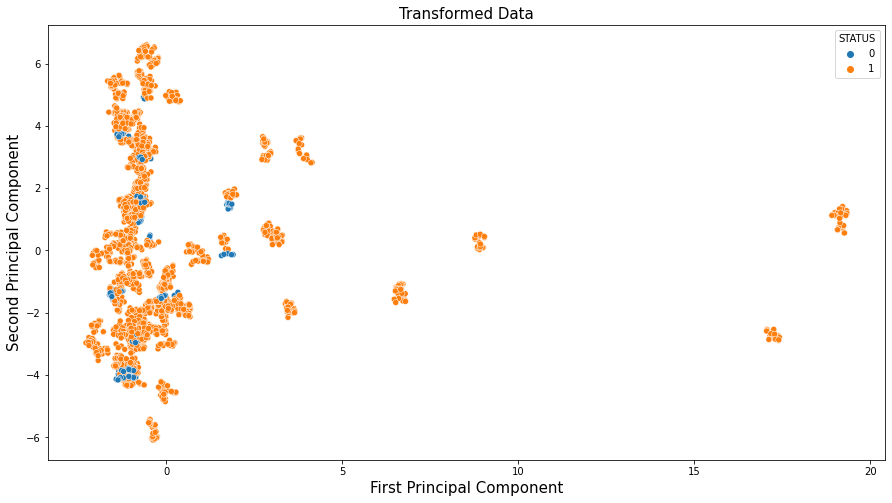

In [171]:
# pass the target variable to the parameter 'hue' to display the classes of the target variables with different colors
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2, hue = df_salesdata_target)

plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

plt.show()

In [172]:
pca.explained_variance_ratio_*100

array([1.44923221, 1.30094553])

The first component captures 1.45% and second component captures 1.30% of the variability in the dataset

### 3. Write the intuitions about the scatter plot. 

#### As per scatter plot, the principal components are showing large clusters where shipped vlaue is 1. And PC2 seems to be capturing more variation from the data.

<a id="pca-dim"> </a>

## PCA FOR DIMENSION REDUCTION

### 1. Fit the PCA model on the data and plot a graph between n_components and cumulative explained variance

In [174]:
pca = PCA(n_components = 633, random_state = 2020)  #taking all columns of our dataset

# fitting PCA with 2 components and transforming the standardized data
pca_633 = pca.fit(df_salesdata_std)

# X_pca_62 stores the transformed values of the principal components returned by the PCA() class. 
X_pca_633 = pca_633.transform(df_salesdata_std)

In [175]:
print("Variance explained by all 633 principal components = ", sum(pca_633.explained_variance_ratio_*100))

Variance explained by all 633 principal components =  100.00000000000006


In [176]:
#get the cumulative sum of the explained_variance_ratio_ array and plot a graph

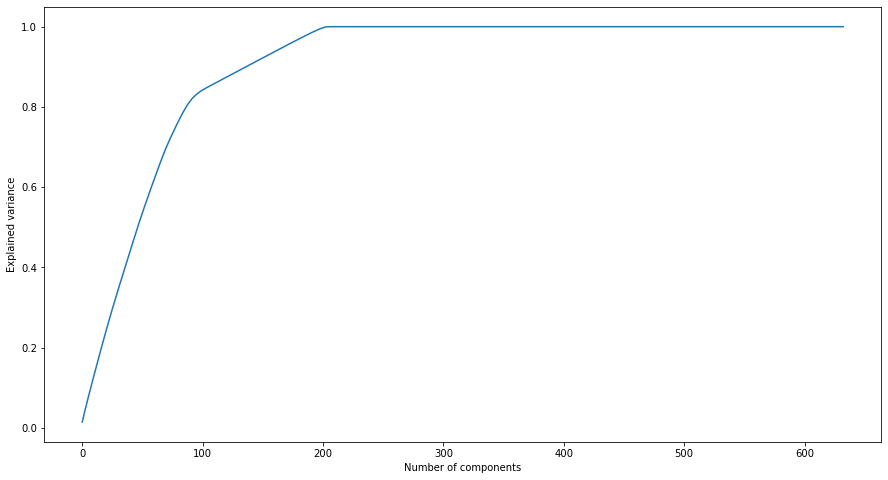

In [177]:
plt.plot(np.cumsum(pca_633.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

### 2. In how many components we are getting approximately 90% of explained Variance

In [178]:
print("Variance explained by the first principal component = ",np.cumsum(pca_633.explained_variance_ratio_ *100)[0])

Variance explained by the first principal component =  1.46171642165777


In [179]:
print("Variance explained by the 30th principal component = ",np.cumsum(pca_633.explained_variance_ratio_ *100)[29])

Variance explained by the 30th principal component =  33.64358291062782


In [180]:
print("Variance explained by the 100th principal component = ",np.cumsum(pca_633.explained_variance_ratio_ *100)[99])

Variance explained by the 100th principal component =  84.04978148534276


In [181]:
print("Variance explained by the 137th principal component = ",np.cumsum(pca_633.explained_variance_ratio_ *100)[136])

Variance explained by the 137th principal component =  90.0062553930833


#### We are getting 90% of explained Variance in the first 137 of the principal components

<a id="lda"> </a>
## LDA

### 1. Split the dataset into two parts (i.e. 80% train and 20% test) using random_state=42

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df_salesdata_std, df_salesdata_target, test_size = 0.2, random_state = 42)

# check the shape of the train and test sets
print('X_train_raw:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test_raw:', X_test.shape)
print('y_test:', y_test.shape)

X_train_raw: (2258, 633)
y_train: (2258,)
X_test_raw: (565, 633)
y_test: (565,)


### 2. Train a Linear Discriminant Analysis(LDA) model on the train data.  Do fit_transform on the train data and only transform on the test data. Use n_components=1.

In [183]:
lda = LDA(n_components = 1)

# fit and transform the LDA on train data using the 'fit_transform()' 
X_train_lda = lda.fit_transform(X_train, y_train)

# only transform the test data 
X_test_lda = lda.transform(X_test)

In [184]:
# check the dimension of transformed data using shape
X_train_lda.shape, X_test_lda.shape

((2258, 1), (565, 1))

### 3. Train a RandomForest classifier model on the transformed train and test data. Print the accuracy score.

In [185]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train_lda,y_train)
model_rf.score(X_test_lda,y_test)

0.9026548672566371